# **Advanced Machine Learning**

Yurag, Marivient Alexia R.

BSCS - IS - 3B

March 13, 2024

Exercise 7 Sample

**Time Series Analysis with ARIMA MODEL**

**1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**2. Load Dataset**

In [ ]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

**3. Convert Month to Datetime**

In [ ]:
data['Month'] = pd.date_range(start = '2000-01-01', periods = len(data),freq = 'M')
data.set_index('Month', inplace = True)

**4. Plot the Time Series**

(array([10957., 11078., 11201., 11323., 11443., 11566., 11688., 11808.,
        11931., 12053.]),
 [Text(10957.0, 0, '2000-01'),
  Text(11078.0, 0, '2000-05'),
  Text(11201.0, 0, '2000-09'),
  Text(11323.0, 0, '2001-01'),
  Text(11443.0, 0, '2001-05'),
  Text(11566.0, 0, '2001-09'),
  Text(11688.0, 0, '2002-01'),
  Text(11808.0, 0, '2002-05'),
  Text(11931.0, 0, '2002-09'),
  Text(12053.0, 0, '2003-01')])

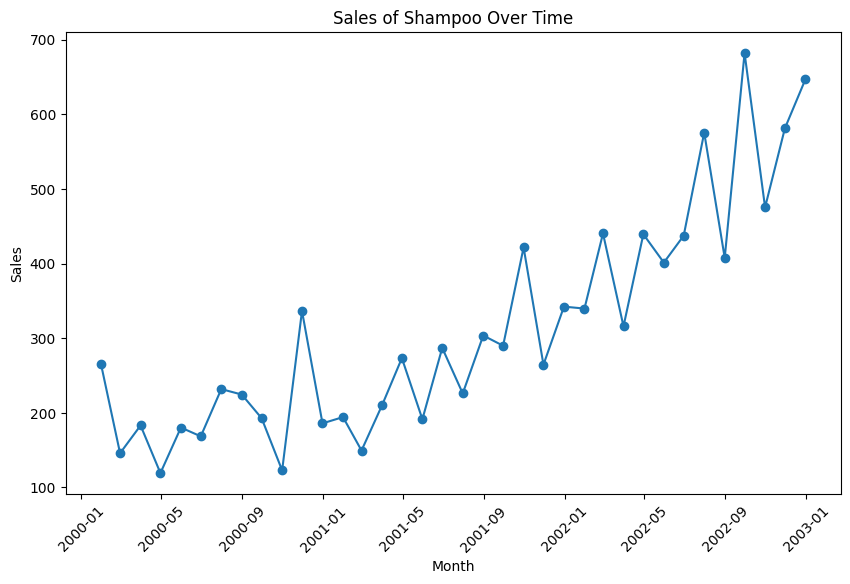

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'], marker = 'o',linestyle = '-')
plt.title('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation = 45)


**5. Decomposition**

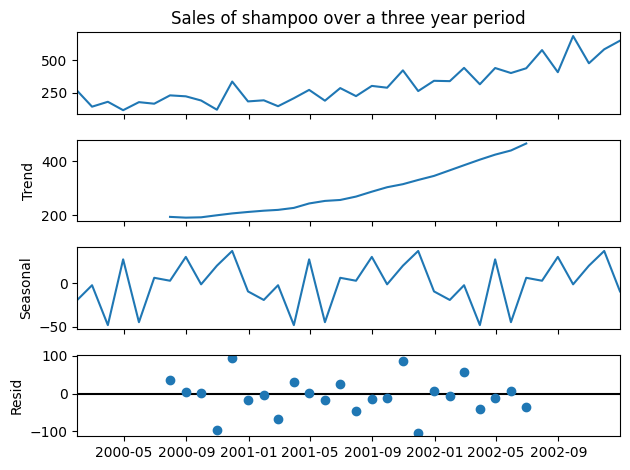

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model = 'additive')

fig = decomposition.plot()

plt.show()

**6. Forecasting with ARIMA**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Sales of shampoo over a three year period'])

print('ADF Statistics: ', adf_test[0])
print('p-value: ', adf_test[1])

ADF Statistics:  3.060142083641181
p-value:  1.0


**7. Fit an ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Sales of shampoo over a three year period'], order = (1,1,1))

results = model.fit()

print(results.summary())

**8. Forecasting Future Values**

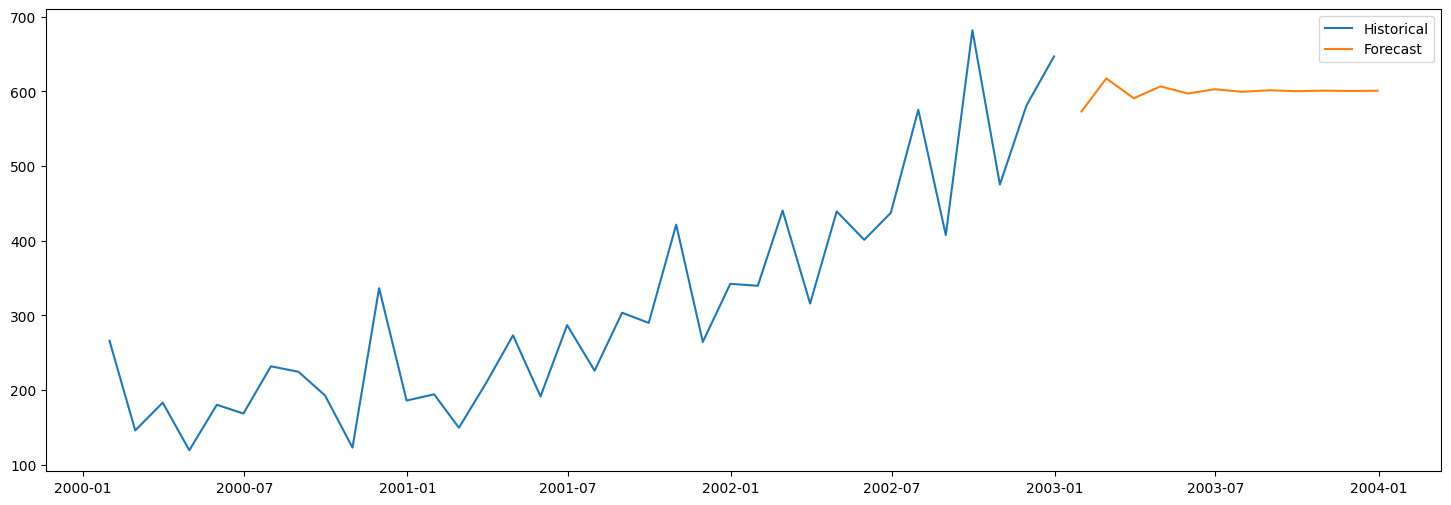

In [ ]:
forecast = results.forecast(steps = 12)

plt.figure(figsize = (18,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'], label = 'Historical')
plt.plot(forecast.index, forecast, label = 'Forecast')
plt.legend()
plt.show()